In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib notebook

import keras

from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
dirs = os.listdir('/Users/ishpreet/Desktop/Major Project/Datasets/')
path = '/Users/ishpreet/Desktop/Major Project/Datasets/'
flag=0
labels = []
lab=[]
langName = []


In [4]:
c = 0
x = 0
lanc = 0
imgarr = []

for i in dirs:
    
    
    
    if(i[0]=='.'):
        continue
   

    print(i)
    st = path+i
    flag = 0
    
    
    if(i=='English'):
        
        flag = 1
    
    
    
    for j in os.listdir(st):
        
        
        if(j[0]=='.'):
            continue
            
        st2 = st+'/'+j
        x = x+1
        
        for k in os.listdir(st2):
            
            if(k[0]=='.'):
                continue
            
            img = cv2.imread(st2+'/'+k, 0)
            
            #print (img.shape)
            
#             kernel = np.ones((2,2),np.uint8)
#             img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
            
            
            
            
            random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            
            finimg = img
            
            if(flag==1):
            
                image, contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

                maxa = 0
                maxx = 0
                maxy = 0
                maxw,maxh=0,0

                for contour in contours:
                # get rectangle bounding contour
                    [x, y, w, h] = cv2.boundingRect(contour)

                    if(w*h>maxa):

                        maxa,maxx,maxy,maxw,maxh = w*h,x,y,w,h
                        
                    

                
                finimg = img[maxy:maxy+maxh,maxx:maxx+maxw]
                
                
            else:
                
                kernel = np.ones((2,2),np.uint8)
                finimg = cv2.dilate(finimg,kernel,iterations = 1)
                

            finimg = cv2.resize(finimg, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)

            random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

            c = c+1

            
            labels.append(i+j)
            lab.append(x)
            imgarr.append(finimg)
            langName.append(lanc)
            
    lanc = lanc+1

Hindi
English
Tamil


In [5]:
labs = np_utils.to_categorical(langName)
labs.shape

(26501, 3)

In [6]:
np.unique(langName,return_counts=True)

(array([0, 1, 2]), array([12691,  3410, 10400]))

In [7]:
imgarr = np.array(imgarr).reshape((len(imgarr), 50, 50, 1))

In [8]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(50, 50, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(labs.shape[1]))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        4624      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 8)         1160      
_________________________________________________________________
activation_3 (Activation)    (None, 21, 21, 8)         0         
__________

In [9]:
hist = model.fit(imgarr, labs,
                epochs=10,
                shuffle=True,
                batch_size=100,
                validation_split=0.2)

Train on 21200 samples, validate on 5301 samples
Epoch 1/10
21200/21200 [==============================] - 37s 2ms/step - loss: 4.2998 - acc: 0.6208 - val_loss: 1.1802 - val_acc: 0.5286
Epoch 2/10
21200/21200 [==============================] - 35s 2ms/step - loss: 0.4829 - acc: 0.8107 - val_loss: 1.1393 - val_acc: 0.6348
Epoch 3/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.3279 - acc: 0.8774 - val_loss: 1.0263 - val_acc: 0.6929
Epoch 4/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.2318 - acc: 0.9146 - val_loss: 1.1254 - val_acc: 0.6750
Epoch 5/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.1843 - acc: 0.9332 - val_loss: 1.1019 - val_acc: 0.6814
Epoch 6/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.1585 - acc: 0.9431 - val_loss: 1.2249 - val_acc: 0.6791
Epoch 7/10
21200/21200 [==============================] - 35s 2ms/step - loss: 0.1480 - acc: 0.9476 - val_loss: 1.2308 - val_acc:

(623, 1200)
7
{0: 223, 2: 95, 1: 68}


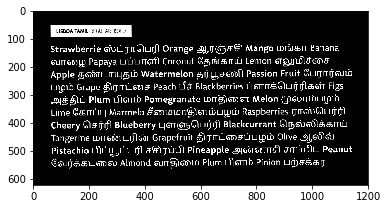

In [32]:
Image=cv2.imread('/Users/ishpreet/Downloads/tameng.jpeg', 0)
#create a CLAHE object (Arguments are optional).
# plt.imshow(img,cmap = 'gray')
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
Image = clahe.apply(Image)
I=Image.copy()

i=Image.copy()
G_Image=Image

print(i.shape)
chars = []

#Otsu Thresholding
blur = cv2.GaussianBlur(G_Image,(1,1),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(th > 0))
angle = cv2.minAreaRect(coords)[-1]
 

# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)

    
else:    
    angle = - angle
    

# rotate the image to deskew it
(h, w) = Image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
th = cv2.warpAffine(th, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
plt.imshow(th,cmap = 'gray')

image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)

for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)
        
        chars.append((x,y,w,h))

        if h>20:
            continue


chars = sepwords(th,chars)


      
pred = {}

for n in range(len(chars)):
    
    finimg = i[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]]
    
    if(finimg.shape[0]*finimg.shape[1]>120):
        
        finimg = finimg.astype('uint8')
        random, finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        finimg = cv2.resize(finimg, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)
        random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        finimg = np.array(finimg).reshape(( -1,50, 50, 1))
        
        try:
            pred[np.argmax(model.predict(finimg))]=pred[np.argmax(model.predict(finimg))]+1
            
        except:
            pred[np.argmax(model.predict(finimg))]=1
        
        
print(pred)

In [25]:


def sepwords(img , cord):
    
    coun = 0
    fincord = []
    
    
    for n in range(len(cord)):
        
        if(cord[n][2]/cord[n][3]<3):
            
            fincord.append(cord[n])
            continue
            
        coun += 1

        hinimg = img[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]]
        
        r,c = hinimg.shape
        s = []
        s1=0
        ms = 0

        for i in range(r):
            s1=0   
            for j in range(c):

                s1+=hinimg[i][j]

            if s1>ms:
                ms = s1

            s.append(s1)


        rows2del = []

        for i in range(r):

            if s[i]>=0.80*ms:

                for j in  range(c):

                    hinimg[i][j] = 0

        #plt.imshow(hinimg,cmap='gray')


        hini = hinimg.copy()

        char = []

        image1, contours1, hierarchy1 = cv2.findContours(hini,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        #img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)

        for contour in contours1:
                # get rectangle bounding contour
                [x, y, w, h] = cv2.boundingRect(contour)

                fincord.append((x,y,w,h))
                
      
    print(coun)
    return fincord


